# Langchain Due Diligence Agent Research

I took the below graphic from [this medium Article](https://medium.com/@KaarthikSenthilKumar/rag-based-q-and-a-system-on-sec-edgar-filings-langchain-streamlit-5f3f088b6f49). I didn't find this until after I had done all of our research, naturally, and our system is a little more complex as it involves multiple different retrievers, but it provides a nice high-level overview of a subsection of this process.

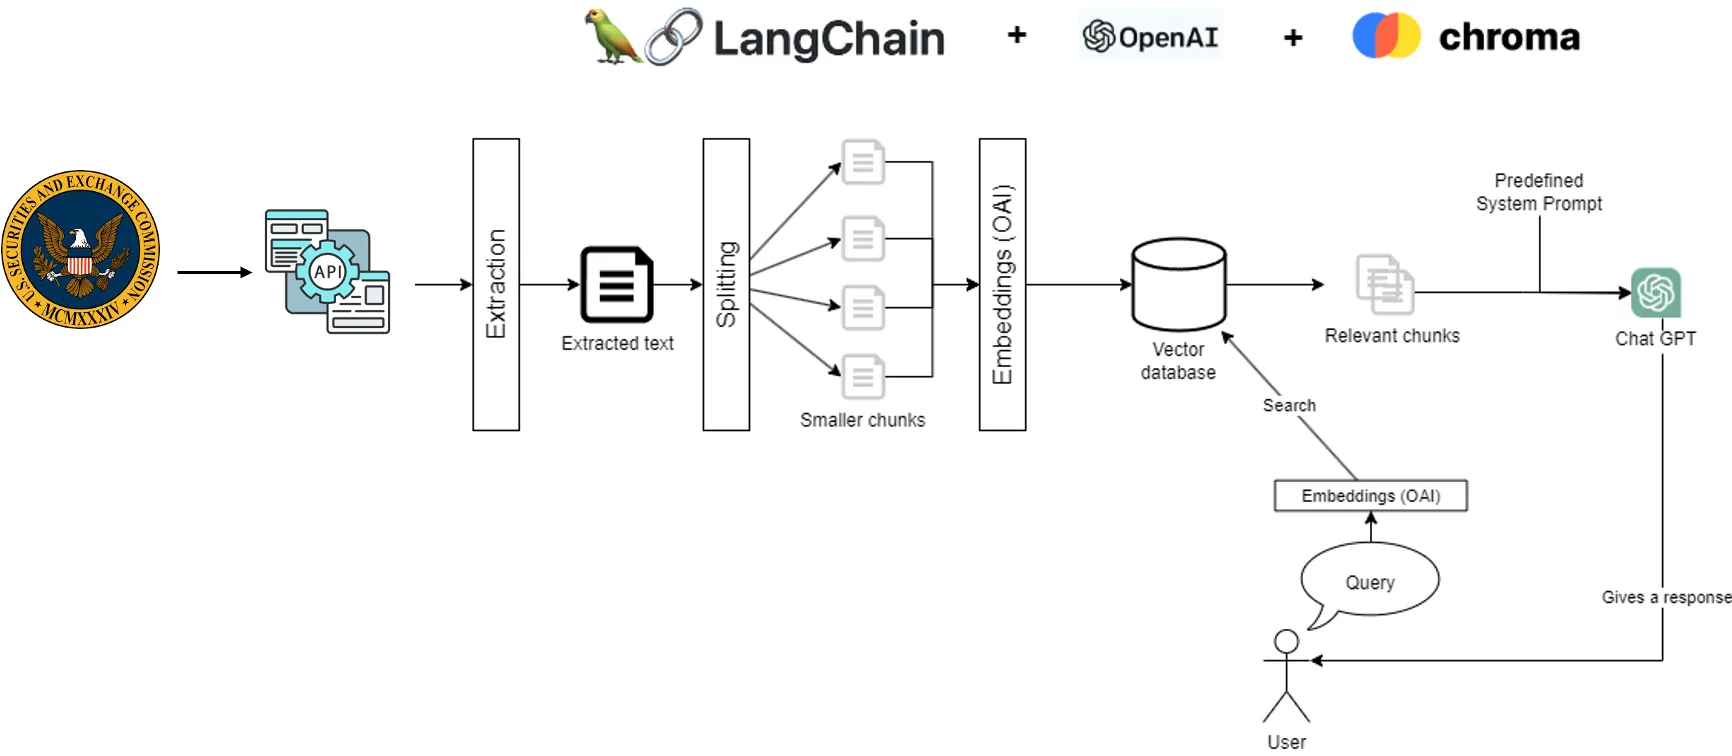

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get("HF_TOKEN")
os.environ['GOOGLE_SEARCH_KEY'] = userdata.get("GOOGLE_SEARCH_KEY")
os.environ['GOOGLE_API_CLIENT'] = userdata.get("GOOGLE_API_CLIENT")

os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_SEARCH_API_KEY")
os.environ['GOOGLE_CSE_ID'] = userdata.get("GOOGLE_CSE_ID")

## Step 0: Package Installation

In [ ]:
!pip install langchain langchain_community python-edgar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.3 MB/s eta 0:00:00


In [ ]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install langchain['llms']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.3/226.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.3 MB/s eta 0:00:00
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.

In [ ]:
!pip install -q langchain-openai langchain playwright beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 32.3 MB/s eta 0:00:00


In [ ]:
!playwright install

152.8 MiB [] 0% 10.1s152.8 MiB [] 0% 23.8s152.8 MiB [] 0% 9.8s152.8 MiB [] 0% 7.0s152.8 MiB [] 1% 6.2s152.8 MiB [] 1% 5.0s152.8 MiB [] 1% 4.8s152.8 MiB [] 2% 4.7s152.8 MiB [] 2% 4.9s152.8 MiB [] 2% 5.0s152.8 MiB [] 3% 5.0s152.8 MiB [] 3% 4.6s152.8 MiB [] 4% 4.6s152.8 MiB [] 4% 4.8s152.8 MiB [] 4% 4.7s152.8 MiB [] 5% 4.5s152.8 MiB [] 5% 4.3s152.8 MiB [] 6% 4.2s152.8 MiB [] 7% 4.0s152.8 MiB [] 7% 3.9s152.8 MiB [] 8% 3.7s152.8 MiB [] 8% 3.6s152.8 MiB [] 9% 3.6s152.8 MiB [] 9% 3.7s152.8 MiB [] 10% 3.6s152.8 MiB [] 11% 3.5s152.8 MiB [] 12% 3.4s152.8 MiB [] 12% 3.3s152.8 MiB [] 13% 3.4s152.8 MiB [] 14% 3.4s152.8 MiB [] 15% 3.4s152.8 MiB [] 16% 3.3s152.8 MiB [] 17% 3.2s152.8 MiB [] 18% 3.0s152.8 MiB [] 19% 2.9s152.8 MiB [] 20% 2.9s152.8 MiB [] 21% 2.8s152.8 MiB [] 21% 2.7s152.8 MiB [] 22% 2.8s152.8 MiB [] 22% 2.7s152.8 MiB [] 23% 2.7s152.8 MiB [] 24% 2.7s152.8 MiB [] 25% 2.7s152.8 MiB [] 25% 2.6s152.8 MiB [] 26% 2.6s152.8 MiB [] 27% 2.6s152.8 MiB [] 28% 2.7s152.8 MiB [] 29% 2.7s152.8 MiB [] 3

In [ ]:
!pip install chromadb

In [ ]:
!pip install html2text

In [ ]:
!pip install google-api-core==2.11.1 google-api-python-client==2.95.0 google-auth==2.22.0 google-auth-httplib2==0.1.0 googleapis-common-protos==1.59.1 tiktoken==0.4.0 faiss-cpu==1.7.4

In [ ]:
!pip install langchain==0.0.131

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.2/477.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.27
    Uninstalling SQLAlchemy-2.0.27:
      Successfully uninstalled SQLAlchemy-2.0.27
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.3
    Uninstalling pydantic-2.6.3:
      Successfully uninstalled pydantic-2.6.3
  Attempting uninstall: dataclasses-json
    Found existing installation: dataclasses-json 0.6.4
    Uninstalling dataclasses-json-0.6.4:
      Successfully uninstalled dataclasses-json-0.6.4
  Attempting uninstall: langchain
    Found existing installation: langchain 0.1.10
    Uninstalling langchain-0.1.10:
      Successfully uninstalled langchain-0.1.10
ERROR: pip's dependency resolver does not currently take into account 

## Web Search

Reference: [Langchain Web Scraping Use Case](https://python.langchain.com/docs/use_cases/web_scraping)

In [ ]:
from langchain.callbacks.base import BaseCallbackHandler
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.retrievers.web_research import WebResearchRetriever

import os

In [ ]:
os.environ["OPENAI_API_BASE"] = "https://api.openai.com/v1"

In [ ]:
def settings_multiretriever():

    # Vectorstore
    import faiss
    from langchain.vectorstores import FAISS
    from langchain.embeddings.openai import OpenAIEmbeddings
    from langchain.docstore import InMemoryDocstore
    embeddings_model = OpenAIEmbeddings()
    embedding_size = 1536
    index = faiss.IndexFlatL2(embedding_size)
    vectorstore_public = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {})

    # LLM
    from langchain.chat_models import ChatOpenAI
    llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k", temperature=0, streaming=True)

    # Search
    from langchain.utilities import GoogleSearchAPIWrapper
    search = GoogleSearchAPIWrapper()

    # Initialize
    web_retriever = WebResearchRetriever.from_llm(
        vectorstore=vectorstore_public,
        llm=llm,
        search=search,
        num_search_results=10
    )

    retrievers = [web_retriever]
    print('1')
    custom_retriever = CustomRetriever()
    print('2')
    custom_retriever.set_retrievers(retrievers)
    print('3')

    return (custom_retriever, llm)

In [ ]:
def necessary_setup():

    # Vectorstore
    import faiss
    from langchain.vectorstores import FAISS
    from langchain.embeddings.openai import OpenAIEmbeddings
    from langchain.docstore import InMemoryDocstore
    embeddings_model = OpenAIEmbeddings()
    embedding_size = 1536
    index = faiss.IndexFlatL2(embedding_size)
    vectorstore_public = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {})

    # LLM
    from langchain.chat_models import ChatOpenAI
    llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k", temperature=0, streaming=True)

    # Search
    from langchain.utilities import GoogleSearchAPIWrapper
    search = GoogleSearchAPIWrapper()

    # Initialize
    web_retriever = WebResearchRetriever.from_llm(
        vectorstore=vectorstore_public,
        llm=llm,
        search=search,
        num_search_results=10
    )

    return (web_retriever, llm)

In [ ]:
from langchain.schema.retriever import BaseRetriever
from langchain.callbacks.manager import CallbackManagerForRetrieverRun

class CustomRetriever(BaseRetriever):

  retrievers = []

  class Config:
      arbitrary_types_allowed = True

  def set_retrievers(self, _retrievers):
    self.retrievers = _retrievers

  def _get_relevant_documents(
      self, query: str, *, run_manager: CallbackManagerForRetrieverRun
  ):
    # Use all existing retrievers to get the documents
    documents = []
    for i, retriever in enumerate(self.retrievers):
        documents.extend(retriever.get_relevant_documents(query, callbacks=run_manager.get_child(f"retriever_{i+1}")))

    return documents

  def get_relevant_documents(
      self, query: str, *, run_manager: CallbackManagerForRetrieverRun
  ):
    # Use all existing retrievers to get the documents
    documents = []
    for i, retriever in enumerate(self.retrievers):
        documents.extend(retriever.get_relevant_documents(query, callbacks=run_manager.get_child(f"retriever_{i+1}")))

    return documents

In [ ]:
web_retriever, llm = necessary_setup()

In [ ]:
multi_retriever, llm = settings_multiretriever()

1
2
3


## Testing

In [ ]:
import logging
logging.basicConfig()
logging.getLogger("langchain.retrievers.web_research").setLevel(logging.INFO)

qa_chain = RetrievalQAWithSourcesChain.from_chain_type(llm, retriever=multi_retriever)
question = "What is AAPL's most recent credit rating?"

result = qa_chain({"question": question})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': "What is AAPL's most recent credit rating?", 'text': ['1. "What is the current credit rating of AAPL?"\n', '2. "AAPL\'s latest credit rating?"\n', '3. "What is the credit rating of AAPL as of now?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "What is the current credit rating of AAPL?"\n', '2. "AAPL\'s latest credit rating?"\n', '3. "What is the credit rating of AAPL as of now?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': "Apple Inc. -- Moody's upgrades Apple to Aaa; outlook stable", 'link': 'https://finance.yahoo.com/news/apple-inc-moodys-upgrades-apple-180006245.html', 'snippet': "Dec 21, 2021 ... Rating Action: Moody's upgra

`Answer:`

Apple's most recent credit rating is Aaa. 

`Sources:`

https://finance.yahoo.com/news/apple-inc-moodys-upgrades-apple-180006245.html


## Google JSON Search Queries

In [ ]:
import requests
import os
from google.colab import userdata
os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_SEARCH_API_KEY")
os.environ['GOOGLE_SEARCH_KEY'] = userdata.get("GOOGLE_SEARCH_KEY")
os.environ['GOOGLE_API_CLIENT'] = userdata.get("GOOGLE_API_CLIENT")
os.environ['GOOGLE_CSE_ID'] = userdata.get("GOOGLE_CSE_ID")

# Define arbitrary search query for a ticker (we'll use AAPL in this case)
search_query = "AAPL"

base_url = "https://www.googleapis.com/customsearch/v1"

query_params = {
    "key": os.environ['GOOGLE_API_KEY'],
    "cx": os.environ['GOOGLE_CSE_ID'],
    "q": search_query,
}

try:
    response = requests.get(base_url, params=query_params)
    response.raise_for_status()
    print(response.json())

except requests.exceptions.RequestException as e:
    print(f"Error: {e}")


{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - AAPL', 'totalResults': '32700000', 'searchTerms': 'AAPL', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding': 'utf8', 'safe': 'off', 'cx': '85018a08318cf4ed2'}], 'nextPage': [{'tit

## Retrieve Financial Docs

In [1]:
import requests
import pandas as pd
import json

# via gemini :)
def download_file(url, filename):
  """Downloads file from the given URL and saves it locally."""
  response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}) # bypass 403
  if response.status_code == 200:
    with open(filename, 'wb') as f:
      f.write(response.content)
    print(f"Downloaded {filename} successfully.")
  else:
    print(f"Failed to download {filename}. Status code: {response.status_code}")

def load_json(filename):
  """Loads a JSON file from the given path."""
  with open(filename, 'r') as f:
    data = json.load(f)
  return data

def load_txt(filename):
  """Loads a tab-delimited text file into a dictionary."""
  data = {}
  with open(filename, 'r') as f:
    for line in f:
      ticker, cik = line.strip().split('\t')
      data[ticker] = cik
  return data

def ticker_to_cik(ticker, json_data):
  """Maps a ticker symbol to its corresponding CIK from the JSON data."""
  for key, value in json_data.items():
    if value['ticker'] == ticker:
      return value['cik_str']
  return None

# Download files
download_file("https://www.sec.gov/files/company_tickers.json", "company_tickers.json")
download_file("https://www.sec.gov/include/ticker.txt", "ticker.txt")

# Load data
json_data = load_json("company_tickers.json")
txt_data = load_txt("ticker.txt")

# Example usage
cik = ticker_to_cik("AAPL", json_data)
if cik:
  print(f"CIK for AAPL: {cik}")
else:
  print("Ticker symbol not found in JSON data.")

Downloaded company_tickers.json successfully.
Downloaded ticker.txt successfully.
CIK for AAPL: 320193


### (a) Figuring out Scraping

In [ ]:
import requests
import pandas as pd

# Define base URL and CIK
base_url = "https://data.sec.gov/submissions/"
cik = "CIK0000320193"

# Get main JSON data
response = requests.get(f"{base_url}{cik}.json", headers={"User-Agent": "Mozilla/5.0"})
print(response)
data = response.json()

# Extract recent filings data
recent_filings = data["filings"]["recent"]

# Convert recent filings data to pandas DataFrame
df = pd.DataFrame(recent_filings)

# Print DataFrame head
print(df.head())

print(df.describe())

# Loop through recent filings and download individual files
for filing in recent_filings:
  print(filing)
  # filing_id = filing["filing_id"]
  # filing_url = f"{base_url}{cik}-{filing_id}-submissions-001.json"

  # # Download individual filing data
  # response = requests.get(filing_url)
  # filing_data = response.json()

  # # Save individual filing data locally
  # with open(f"{filing_id}.json", "w") as f:
  #   json.dump(filing_data, f)

<Response [200]>
        accessionNumber  filingDate  reportDate        acceptanceDateTime act  \
0  0000320193-24-000039  2024-03-01  2024-02-28  2024-03-01T18:36:45.000Z       
1  0000320193-24-000038  2024-03-01  2024-02-28  2024-03-01T18:36:08.000Z       
2  0000320193-24-000037  2024-03-01  2024-02-28  2024-03-01T18:35:22.000Z       
3  0000320193-24-000036  2024-03-01  2024-02-28  2024-03-01T18:34:41.000Z       
4  0000320193-24-000035  2024-03-01  2024-02-28  2024-03-01T18:33:38.000Z       

  form fileNumber filmNumber items  size  isXBRL  isInlineXBRL  \
0    4                              5739       0             0   
1    4                              5742       0             0   
2    4                              5618       0             0   
3    4                              8280       0             0   
4    4                              5730       0             0   

                      primaryDocument primaryDocDescription  
0  xslF345X05/wk-form4_1709336196.xml

In [ ]:
# Data cleaning
df["filingDate"] = pd.to_datetime(df["filingDate"])

# Define cutoff date (based on input)
cutoff_date = pd.to_datetime("2020-03-14") # March 2020

filtered_df = df[(df['form'] == "10-K") & (df['filingDate'] < cutoff_date)]

filtered_df = df[(df['filingDate'] < cutoff_date)]

grouped_data = filtered_df.groupby('form')[['filingDate', 'accessionNumber']].max()

In [ ]:
grouped_data

,filingDate,accessionNumber
form,,
10-K,2019-10-31,0001628280-16-020309
10-Q,2020-01-29,0001628280-17-004790
25,2019-03-14,0001193125-19-074874
3,2019-02-07,0001209191-15-087193
3/A,2019-04-17,0000320193-19-000058
4,2020-02-28,0001628280-17-006558
424B2,2019-11-08,0001193125-19-288412
8-A12B,2019-11-15,0001193125-19-292825
8-K,2020-02-27,0001628280-17-004663


In [ ]:
accession_number = '0001628280-16-020309'.replace('-','')
doc_url = f"https://www.sec.gov/Archives/edgar/data/{cik[3:]}/{accession_number}/Financial_Report.xlsx"

response = requests.get(doc_url, headers={"User-Agent": "Mozilla/5.0"})
print(response.content)

if response.status_code == 200:
  # Download successful, save content to file
  with open("Financial_Report.xlsx", "wb") as f:
    f.write(response.content)
  print("Downloaded Financial_Report.xlsx successfully!")
else:
  print(f"Failed to download document. Status code: {response.status_code}")

b'PK\x03\x04\x14\x00\x00\x00\x08\x00n\x85ZI\xa6\x05\x14\xd61\x02\x00\x00\xf3+\x00\x00\x13\x00\x00\x00[Content_Types].xml\xcd\xda\xcdn\xd3@\x10\x07\xf0W\x89|E\xf1f?\r\xa8\xe9\x85r\x85J\xf0\x02\x8b=\x89\xad\xd8\xde\xd5\xee6M\xdf\x9e\xb5\xd3"\x88R\xd4B#\xfd/q\x9c\xd9\x9d\x19{\xec\xdf)W\xdf\x1f<\xc5\xc5a\xe8\xc7\xb8.\xda\x94\xfcG\xc6b\xdd\xd2`c\xe9<\x8d9\xb2qa\xb0)\x9f\x86-\xf3\xb6\xde\xd9-1\xb1Z\x19V\xbb1\xd1\x98\x96i\xcaQ\\_}\xddS\x08]C\x8bO\xc7\xc0\x94{]X\xef\xfb\xae\xb6\xa9s#\xdb\x8f\xcdI\xd6\xa5\xdbl\xba\x9a\x1aW\xdf\ryK\x99riz\x97\xe3\xc5\xe2\xd6\x86\xf4\xc5\x0e9\x05;\xf4l\x0e\x1c?y9\xc5\xd9\xdb\x14\x8c>\x90mbK\x94\x86\xbe\x8c\xe9\xa1\xa7x\xae\xfe1\xf2T\xf9\x866\xf6\xaeO\xaf*\xfcx\xef\xca@\xfd\xbc&\xb6\x9d\x7f,\xf5\xf9\x90\xb3\xc4\xfc\xdb\xba\xc8\xd1\xf8\xa2\n\xa7\x1b\xff\xd6Y7LC\xf3\xe3\xf6\x8f\x1d\xd3\xf9?^\xcb\xc9M\xdc\x0f\xfdM\xb0\xf7\xddI\x81\xfd\xc5\xc64\x1d\xcb\xc1v\xe3\xb9Q\xdd\xbb\xb0\xfb\xe1\xdc\xee-\x1f\x13\x9a\xae\xaa\xa1f\xe9C^\x18Rw\xe6)\xc9\x8bos4\xb2\x9c\xfa\xbfj?=)\x

In [ ]:
from bs4 import BeautifulSoup
import requests

# define the base url needed to create the file url.
base_url = r"https://www.sec.gov"

# convert a normal url to a document url
normal_url = r"https://www.sec.gov/Archives/edgar/data/1265107/0001265107-19-000004.txt"
normal_url = normal_url.replace('-','').replace('.txt','/index.json')

# define a url that leads to a 10k document landing page
documents_url = r"https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/index.json"

# request the url and decode it.
content = requests.get(documents_url, headers={"User-Agent": "Mozilla/5.0"}).json()

import re
def ends_with_index_html(text):
  return text[-10:] == 'index.html'

for file in content['directory']['item']:

    if ends_with_index_html(file['name']):
      print(file['name']) # this is our 10K :)
      tenk_path = base_url + content['directory']['name'] + "/" + file['name']
      print('File Name: ' + file['name'])
      print('File Path: ' + tenk_path)

    # Grab the filing summary and create a new url leading to the file so we can download it.
    if file['name'] == 'FilingSummary.xml':

        xml_summary = base_url + content['directory']['name'] + "/" + file['name']

        print('-' * 100)
        print('File Name: ' + file['name'])
        print('File Path: ' + xml_summary)

# define a new base url that represents the filing folder. This will come in handy when we need to download the reports.
base_url = xml_summary.replace('FilingSummary.xml', '')

0001628280-16-020309-index.html
File Name: 0001628280-16-020309-index.html
File Path: https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/0001628280-16-020309-index.html
----------------------------------------------------------------------------------------------------
File Name: FilingSummary.xml
File Path: https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/FilingSummary.xml


In [ ]:
# request and parse the content
content = requests.get(tenk_path, headers={"User-Agent": "Mozilla/5.0"}).content
soup = BeautifulSoup(content, 'lxml')

all_links = soup.find_all('a')

saved_links = []

url_piece = base_url.split('.gov')[1]

for link in all_links:
    href = link.get('href')
    if href and url_piece in href and href.endswith(".htm"):
        saved_links.append(href.split('/')[-1])
        print(f"Saved link: {href}")

Saved link: /Archives/edgar/data/320193/000162828016020309/a201610-k9242016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit101810k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit101910k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit12110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit21110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit23110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit31110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit31210k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit32110k2016.htm


In [ ]:
saved_links

['a201610-k9242016.htm',
 'exhibit101810k2016.htm',
 'exhibit101910k2016.htm',
 'exhibit12110k2016.htm',
 'exhibit21110k2016.htm',
 'exhibit23110k2016.htm',
 'exhibit31110k2016.htm',
 'exhibit31210k2016.htm',
 'exhibit32110k2016.htm']

In [ ]:
content = requests.get(f"{base_url}{saved_links[0]}", headers={"User-Agent": "Mozilla/5.0"}).content
soup = BeautifulSoup(content, 'lxml')

In [ ]:
soup.text

'\n10-K\n1\na201610-k9242016.htm\n10-K\n\n\n\n\nDocument\n\n\xa0UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549\xa0Form 10-K\xa0\xa0(Mark One)☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0For the fiscal year ended September\xa024, 2016 or☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 to \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Commission File Number: 001-36743\xa0\xa0Apple Inc.(Exact name of Registrant as specified in its charter)\xa0\xa0California\xa094-2404110(State or other jurisdiction of incorporation or organization)\xa0(I.R.S. Employer Identification No.)1 Infinite LoopCupertino, California\xa095014(Address of principal executive offices)\xa0(Zip Code)(408) 996-1010(Registrant’s telephone numb

In [ ]:
tenk_text = soup.text.replace(u'\xa0', u' ')

In [ ]:
tenk_text

'\n10-K\n1\na201610-k9242016.htm\n10-K\n\n\n\n\nDocument\n\n UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549 Form 10-K  (Mark One)☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934        For the fiscal year ended September 24, 2016 or☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from                      to                     Commission File Number: 001-36743  Apple Inc.(Exact name of Registrant as specified in its charter)  California 94-2404110(State or other jurisdiction of incorporation or organization) (I.R.S. Employer Identification No.)1 Infinite LoopCupertino, California 95014(Address of principal executive offices) (Zip Code)(408) 996-1010(Registrant’s telephone number, including area code)  Securities registered pursuant to Section 12(b) of the Act:Common Stock, $0.00001 par value per share1.000%  Notes due 20221.375%  Notes due 2024 1.625%  Notes 

### (b) Now let's do the above in a more structured, generalizable way!

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

def ends_with_index_html(text):
  return text[-10:] == 'index.html'

def get_10k_text_test(cik, cutoff_date="2020-03-14"): # Default cutoff March 2020
  # Define base URL and CIK
  base_url = "https://data.sec.gov/submissions/"

  # Get main JSON data
  response = requests.get(f"{base_url}{cik}.json", headers={"User-Agent": "Mozilla/5.0"})

  data = response.json()

  print('Retrieved SEC data')

  # Extract recent filings data
  recent_filings = data["filings"]["recent"]

  # Convert recent filings data to pandas DataFrame
  df = pd.DataFrame(recent_filings)

  # Data cleaning
  df["filingDate"] = pd.to_datetime(df["filingDate"])

  print('Filtering by cutoff date')

  # Define cutoff date (based on input)
  cutoff_date = pd.to_datetime(cutoff_date)

  # filtered_df = df[(df['form'] == "10-K") & (df['filingDate'] < cutoff_date)]

  filtered_df = df[(df['filingDate'] < cutoff_date)]

  if filtered_df.empty:
    filtered_df = df

  grouped_data = filtered_df.groupby('form')[['filingDate', 'accessionNumber']].max()

  print(grouped_data)

  grouped_data.reset_index(inplace=True)

  _accession_number = grouped_data[grouped_data['form'] == '10-K']['accessionNumber'][0] # 0001628280-16-020309

  accession_number = _accession_number.replace('-','')

  print('Found Accession Number')

  short_cik = cik.split('00')[-1]

  # define the base url needed to create the file url.
  base_url = r"https://www.sec.gov"

  # define a url that leads to a 10k document landing page
  documents_url = f"https://www.sec.gov/Archives/edgar/data/{short_cik}/{accession_number}/index.json"

  # request the url and decode it.
  content = requests.get(documents_url, headers={"User-Agent": "Mozilla/5.0"})

  content = content.json()

  for file in content['directory']['item']:

      if ends_with_index_html(file['name']):
        print(file['name']) # this is our 10K :)
        tenk_path = base_url + content['directory']['name'] + "/" + file['name']
        print('File Name: ' + file['name'])
        print('File Path: ' + tenk_path)

      # also grab the filing summary and create a new url leading to the file
      if file['name'] == 'FilingSummary.xml':

          xml_summary = base_url + content['directory']['name'] + "/" + file['name']

          print('-' * 100)
          print('File Name: ' + file['name'])
          print('File Path: ' + xml_summary)

  # define a new base url that represents the filing folder. This will come in handy when we need to download the reports.
  base_url = xml_summary.replace('FilingSummary.xml', '')

  # request and parse the content
  content = requests.get(tenk_path, headers={"User-Agent": "Mozilla/5.0"}).content
  soup = BeautifulSoup(content, 'lxml')

  all_links = soup.find_all('a')

  saved_links = []

  url_piece = base_url.split('.gov')[1]

  for link in all_links:
      href = link.get('href')
      if href and url_piece in href and href.endswith(".htm"):
          saved_links.append(href.split('/')[-1])
          print(f"Saved link: {href}")

  content = requests.get(f"{base_url}{saved_links[0]}", headers={"User-Agent": "Mozilla/5.0"}).content
  soup = BeautifulSoup(content, 'lxml')

  tenk_text = soup.text.replace(u'\xa0', u' ')

  return tenk_text

def get_10k_text(cik, cutoff_date="2020-03-14"): # Default cutoff March 2020
  # Define base URL and CIK
  base_url = "https://data.sec.gov/submissions/"

  # Get main JSON data
  response = requests.get(f"{base_url}{cik}.json", headers={"User-Agent": "Mozilla/5.0"})

  data = response.json()

  # Extract recent filings data
  recent_filings = data["filings"]["recent"]

  # Convert recent filings data to pandas DataFrame
  df = pd.DataFrame(recent_filings)

  # Data cleaning
  df["filingDate"] = pd.to_datetime(df["filingDate"])

  # Define cutoff date (based on input)
  cutoff_date = pd.to_datetime(cutoff_date)

  # filtered_df = df[(df['form'] == "10-K") & (df['filingDate'] < cutoff_date)]

  filtered_df = df[(df['filingDate'] < cutoff_date)]

  if filtered_df.empty:
    filtered_df = df

  grouped_data = filtered_df.groupby('form')[['filingDate', 'accessionNumber']].max()

  grouped_data.reset_index(inplace=True)

  _accession_number = grouped_data[grouped_data['form'] == '10-K']['accessionNumber'][0] # 0001628280-16-020309

  accession_number = _accession_number.replace('-','')

  short_cik = cik.split('00')[-1]

  # define the base url needed to create the file url.
  base_url = r"https://www.sec.gov"

  # define a url that leads to a 10k document landing page
  documents_url = f"https://www.sec.gov/Archives/edgar/data/{short_cik}/{accession_number}/index.json"

  # request the url and decode it.
  content = requests.get(documents_url, headers={"User-Agent": "Mozilla/5.0"})

  content = content.json()

  for file in content['directory']['item']:

      if ends_with_index_html(file['name']):
        tenk_path = base_url + content['directory']['name'] + "/" + file['name']

      # also grab the filing summary and create a new url leading to the file
      if file['name'] == 'FilingSummary.xml':

          xml_summary = base_url + content['directory']['name'] + "/" + file['name']

  # define a new base url that represents the filing folder. This will come in handy when we need to download the reports.
  base_url = xml_summary.replace('FilingSummary.xml', '')

  # request and parse the content
  content = requests.get(tenk_path, headers={"User-Agent": "Mozilla/5.0"}).content
  soup = BeautifulSoup(content, 'lxml')

  all_links = soup.find_all('a')

  saved_links = []

  url_piece = base_url.split('.gov')[1]

  for link in all_links:
      href = link.get('href')
      if href and url_piece in href and href.endswith(".htm"):
          saved_links.append(href.split('/')[-1])

  content = requests.get(f"{base_url}{saved_links[0]}", headers={"User-Agent": "Mozilla/5.0"}).content
  soup = BeautifulSoup(content, 'lxml')

  tenk_text = soup.text.replace(u'\xa0', u' ')

  return tenk_text

### (c) Testing

In [ ]:
get_10k_text("CIK0000320193")

ici
https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/index.json
<Response [200]>
0001628280-16-020309-index.html
File Name: 0001628280-16-020309-index.html
File Path: https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/0001628280-16-020309-index.html
----------------------------------------------------------------------------------------------------
File Name: FilingSummary.xml
File Path: https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/FilingSummary.xml
Saved link: /Archives/edgar/data/320193/000162828016020309/a201610-k9242016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit101810k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit101910k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit12110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit21110k2016.htm
Saved link: /Archives/edgar/data/320193/000162828016020309/exhibit23110k2016.htm
Saved 

'\n10-K\n1\na201610-k9242016.htm\n10-K\n\n\n\n\nDocument\n\n UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549 Form 10-K  (Mark One)☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934        For the fiscal year ended September 24, 2016 or☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the transition period from                      to                     Commission File Number: 001-36743  Apple Inc.(Exact name of Registrant as specified in its charter)  California 94-2404110(State or other jurisdiction of incorporation or organization) (I.R.S. Employer Identification No.)1 Infinite LoopCupertino, California 95014(Address of principal executive offices) (Zip Code)(408) 996-1010(Registrant’s telephone number, including area code)  Securities registered pursuant to Section 12(b) of the Act:Common Stock, $0.00001 par value per share1.000%  Notes due 20221.375%  Notes due 2024 1.625%  Notes 

In [ ]:
# cik = "CIK0000320193"
get_10k_text("CIK0001318605")

Retrieved SEC data
Filtering by cutoff date
                 filingDate       accessionNumber
form                                             
10-K             2020-02-13  0001564590-20-004475
10-Q             2019-10-29  0001564590-19-038256
3                2019-10-11  0001790565-19-000001
4                2020-03-09  0001790565-20-000003
4/A              2018-02-14  0001288257-18-000001
424B3            2019-05-13  0001193125-19-145433
424B5            2020-02-14  0001193125-20-036491
425              2019-05-13  0001564590-19-018878
8-K              2020-02-19  0001564590-20-005288
8-K/A            2016-12-05  0001564590-16-029779
CORRESP          2019-09-30  0001564590-19-035971
CT ORDER         2020-01-03  9999999997-20-000038
D                2018-11-20  0001288257-18-000026
DEF 14A          2019-04-30  0001564590-19-014268
DEFA14A          2019-04-30  0001564590-19-014276
EFFECT           2019-05-10  9999999995-19-001077
FWP              2019-05-03  0001193125-19-135776
NO ACT

<ipython-input-174-1a1d6c3ced81>:107: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(content)


'\n\n\n\ntsla-10k_20191231.htm\n\n\n\n\n\n\nfalse\n2019\nFY\n0001318605\n--12-31\nLarge Accelerated Filer\nP3Y\nP10Y\n2025-08-31\n2025-08-31\n2021-03-31\n2022-03-31\n2024-05-31\n2020-12-31\n2025-08-31\n2025-08-31\ntrue\ntrue\ntrue\ntrue\n0.25\n0.25\n0.25\n0.25\n2024-12-31\n2028-12-31\nus-gaap:ConstructionMember\n1\ncountry:US\ncountry:US\ncountry:US\nus-gaap:QualifiedPlanMember\nus-gaap:QualifiedPlanMember\nus-gaap:QualifiedPlanMember\nP30Y\nP1Y\n2020-09-30\n0.25\n0.25\n0.25\n0.25\nP25Y\nP10Y\n2021-09-30\n1\nP25Y\nP9Y\nP9Y\nP10Y\n0.027\n0.036\n0.020\n0.040\n0.037\n0.053\n0.048\n0.031\n0.042\n0.045\n0.048\n0.058\n0.079\n0.077\n0.040\n0.058\n0.075\n0.036\n0.059\n0.074\n2020-06\n2020-03\n2020-02\n2024-09\n2020-09\n2033-07\n2048-09\n2020-03\n2023-07\n2031-01\n2023-05\n2048-02\n2024-12\n2035-01\n2049-09\n2022-06\n0.018\n0.040\n0.023\n0.053\n0.060\n0.048\n0.039\n0.036\n0.051\n0.076\n0.077\n0.079\n0.058\n0.061\n0.075\n0.042\n0.059\n0.079\n2019-01\n2024-09\n2019-12\n2033-07\n2019-01\n2048-09\n

## Adding to a vector db

In [ ]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter

# data = get_10k_text("CIK0001318605")

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=500,
    chunk_overlap=100
)

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)

pages = text_splitter.split_text(data)

In [ ]:
pages

In [ ]:
metadatas = [{"document": "10-K", "cik": "CIK0000320193", "source": "Company 10-K"}]

documents = text_splitter.create_documents(
    [pages], metadatas=metadatas
)

In [ ]:
documents[8]

Document(page_content='2017-01-01\n2017-12-31\n\n\n\n\n0001318605\n\nus-gaap:RetainedEarningsMember\nus-gaap:AccountingStandardsUpdate201609Member\n\n\n\n2017-01-01\n2017-12-31\n\n\n\n\n0001318605\n\nus-gaap:AdditionalPaidInCapitalMember\ntsla:TwoPointThreeSevenFivePercentSeniorConvertibleNoteDueTwentyTwentyTwoMember\n\n\n\n2017-01-01\n2017-12-31\n\n\n\n\n0001318605\n\nus-gaap:ParentMember\ntsla:TwoPointThreeSevenFivePercentSeniorConvertibleNoteDueTwentyTwentyTwoMember\n\n\n\n2017-01-01\n2017-12-31\n\n\n\n\n0001318605', metadata={'document': '10-K', 'cik': 'CIK0000320193', 'source': 'Company 10-K'})

In [ ]:
documents[:10]

[Document(page_content='tsla-10k_20191231.htm', metadata={'document': '10-K', 'cik': 'CIK0000320193', 'source': 'Company 10-K'}),
 Document(page_content='false\n2019\nFY\n0001318605\n--12-31\nLarge Accelerated Filer\nP3Y\nP10Y\n2025-08-31\n2025-08-31\n2021-03-31\n2022-03-31\n2024-05-31\n2020-12-31\n2025-08-31\n2025-08-31\ntrue\ntrue\ntrue\ntrue\n0.25\n0.25\n0.25\n0.25\n2024-12-31\n2028-12-31\nus-gaap:ConstructionMember\n1\ncountry:US\ncountry:US\ncountry:US\nus-gaap:QualifiedPlanMember\nus-gaap:QualifiedPlanMember\nus-gaap:QualifiedPlanMember\nP30Y\nP1Y\n2020-09-30\n0.25\n0.25\n0.25\n0.25\nP25Y\nP10Y\n2021-09-30\n1\nP25Y\nP9Y\nP9Y\nP10Y\n0.027\n0.036\n0.020\n0.040\n0.037\n0.053\n0.048\n0.031\n0.042', metadata={'document': '10-K', 'cik': 'CIK0000320193', 'source': 'Company 10-K'}),
 Document(page_content='0.25\nP25Y\nP10Y\n2021-09-30\n1\nP25Y\nP9Y\nP9Y\nP10Y\n0.027\n0.036\n0.020\n0.040\n0.037\n0.053\n0.048\n0.031\n0.042\n0.045\n0.048\n0.058\n0.079\n0.077\n0.040\n0.058\n0.075\n0.036\n0.0

In [ ]:
documents[14]

Document(page_content='0001318605\n\nus-gaap:AccountingStandardsUpdate201409Member\n\n\n\n2018-01-01\n2018-12-31\n\n\n\n\n0001318605\n\nus-gaap:RetainedEarningsMember\nus-gaap:AccountingStandardsUpdate201705Member\n\n\n\n2018-01-01\n2018-12-31\n\n\n\n\n0001318605\n\nus-gaap:ParentMember\nus-gaap:AccountingStandardsUpdate201705Member\n\n\n\n2018-01-01\n2018-12-31\n\n\n\n\n0001318605\n\nus-gaap:AccountingStandardsUpdate201705Member\n\n\n\n2018-01-01\n2018-12-31\n\n\n\n\n0001318605\n\nus-gaap:CommonStockMember\n\n\n\n2018-01-01\n2018-12-31\n\n\n\n\n0001318605', metadata={'document': '10-K', 'cik': 'CIK0000320193', 'source': 'Company 10-K'})

## More Testing

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

embeddings = OpenAIEmbeddings()

vectorstore = FAISS.from_documents(texts, embedding=embeddings)

In [ ]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

def vectorstore_10k(cik):

  data = get_10k_text(cik)

  metadatas = [{"document": "10-K", "cik": "CIK0000320193", "source": "Company 10-K"}]

  text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)

  pages = text_splitter.split_text(data)

  documents = text_splitter.create_documents(
      [pages], metadatas=metadatas
  )

  embeddings = OpenAIEmbeddings()

  vectorstore = FAISS.from_documents(documents, embedding=embeddings)

  return vectorstore

In [ ]:
def settings_multiretriever(cik):

    # Vectorstore
    import faiss
    from langchain.vectorstores import FAISS
    from langchain.embeddings.openai import OpenAIEmbeddings
    from langchain.docstore import InMemoryDocstore
    embeddings_model = OpenAIEmbeddings()
    embedding_size = 1536
    index = faiss.IndexFlatL2(embedding_size)
    vectorstore_public = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {})

    # LLM
    from langchain.chat_models import ChatOpenAI
    llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k", temperature=0, streaming=True)

    # Search
    from langchain.utilities import GoogleSearchAPIWrapper
    search = GoogleSearchAPIWrapper()

    # Initialize
    web_retriever = WebResearchRetriever.from_llm(
        vectorstore=vectorstore_public,
        llm=llm,
        search=search,
        num_search_results=5
    )

    sec_vectorstore = vectorstore_10k(cik)

    sec_doc_retriever = sec_vectorstore.as_retriever()

    retrievers = [web_retriever, sec_doc_retriever]

    custom_retriever = CustomRetriever()

    custom_retriever.set_retrievers(retrievers)

    return (custom_retriever, llm)

In [ ]:
multi_retriever, llm = settings_multiretriever("CIK0000320193")

In [ ]:
multi_retriever, llm = settings_multiretriever("CIK0000320193")

Retrieved SEC data
Filtering by cutoff date
         filingDate       accessionNumber
form                                     
10-K     2019-10-31  0001628280-16-020309
10-Q     2020-01-29  0001628280-17-004790
25       2019-03-14  0001193125-19-074874
3        2019-02-07  0001209191-15-087193
3/A      2019-04-17  0000320193-19-000058
4        2020-02-28  0001628280-17-006558
424B2    2019-11-08  0001193125-19-288412
8-A12B   2019-11-15  0001193125-19-292825
8-K      2020-02-27  0001628280-17-004663
8-K/A    2018-05-08  0001193125-18-154948
CERT     2019-11-15  0001354457-19-000604
CERTNYS  2017-05-25  9999999997-17-006550
CORRESP  2015-08-31  0001193125-15-307923
DEF 14A  2020-01-03  0001193125-20-001450
DEFA14A  2020-01-03  0001193125-20-001452
DFAN14A  2013-12-04  0000928464-13-000275
FWP      2019-11-07  0001193125-19-287351
NO ACT   2016-12-05  9999999997-17-000809
PRE 14A  2013-12-27  0001193125-13-486406
PX14A6G  2020-01-27  0001387131-20-000386
S-3ASR   2018-11-05  0001193125-

In [ ]:
import logging
logging.basicConfig()
logging.getLogger("langchain.retrievers.web_research").setLevel(logging.INFO)

qa_chain = RetrievalQAWithSourcesChain.from_chain_type(llm, retriever=multi_retriever)
question = "What is Apple's address?"

result = qa_chain({"question": question})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': "What is Apple's address?", 'text': ['1. "Where is Apple\'s headquarters located?"\n', '2. "What is the physical address of Apple Inc.?"\n', '3. "Where can I find Apple\'s corporate address?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "Where is Apple\'s headquarters located?"\n', '2. "What is the physical address of Apple Inc.?"\n', '3. "Where can I find Apple\'s corporate address?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': 'Apple Park - Wikipedia', 'link': 'https://en.wikipedia.org/wiki/Apple_Park', 'snippet': 'Apple Park, also known as Apple Campus 2, is the corporate headquarters of Apple Inc., located in Cupertino, Calif

`Answer:`

Apple's corporate headquarters is located at One Apple Park Way, Cupertino, California, United States.

`Sources:`

https://en.wikipedia.org/wiki/Apple_Park, https://maps.apple.com/place?auid=559098170073364042, https://www.apple.com/contact/, Company 10-K


In [ ]:
import logging
logging.basicConfig()
logging.getLogger("langchain.retrievers.web_research").setLevel(logging.INFO)

company_name = "Apple"

qa_chain = RetrievalQAWithSourcesChain.from_chain_type(llm, retriever=multi_retriever)
question = "Are there any safety incidents I should be aware of?"

result = qa_chain({"question": f"{question} {company_name}"})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': 'Are there any safety incidents I should be aware of? Apple', 'text': ['1. "What are the recent safety incidents involving Apple products?"\n', '2. "Are there any known safety issues with Apple devices?"\n', '3. "Has Apple faced any safety-related controversies or incidents?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "What are the recent safety incidents involving Apple products?"\n', '2. "Are there any known safety issues with Apple devices?"\n', '3. "Has Apple faced any safety-related controversies or incidents?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': 'Citizen: Local Safety Alerts on the App Store', 'link': 'https://ap

`Answer:`

There is no specific information provided about safety incidents related to Apple products.
`Sources:`




In [ ]:
def contextualize_question(company_name, question):
  return f"{question} Find the answer for {company_name}"

In [ ]:
question = "Have they acquired or divested another company?"

result = qa_chain({"question": contextualize_question(company_name, question)})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': 'Have they acquired or divested another company? Find the answer for Apple', 'text': ['1. "Has Apple acquired or divested any companies recently?"\n', '2. "What are the latest acquisitions or divestments made by Apple?"\n', '3. "Are there any reports of Apple acquiring or divesting another company?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "Has Apple acquired or divested any companies recently?"\n', '2. "What are the latest acquisitions or divestments made by Apple?"\n', '3. "Are there any reports of Apple acquiring or divesting another company?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': 'List of mergers and acquisitions b

`Answer:`

Apple has acquired multiple companies in the past, with a focus on small tech companies that can be easily integrated into their existing projects. They have acquired approximately 100 companies in the past six years, averaging about three to four companies per week. However, the specific details of their acquisitions are not mentioned in the provided excerpts. 

`Sources:`

https://www.cnbc.com/2021/05/01/how-apple-does-ma-small-and-quiet-with-no-bankers.html, https://en.wikipedia.org/wiki/List_of_mergers_and_acquisitions_by_Apple, https://www.investopedia.com/investing/top-companies-owned-apple/


In [ ]:
question = "Have they had any recent changes in leadership?"

result = qa_chain({"question": contextualize_question(company_name, question)})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': 'Have they had any recent changes in leadership? Find the answer for Apple', 'text': ['1. "Who is the current CEO of Apple?" \n', '2. "Has Apple announced any recent changes in their executive team?" \n', '3. "What is the latest news regarding Apple\'s leadership?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "Who is the current CEO of Apple?" \n', '2. "Has Apple announced any recent changes in their executive team?" \n', '3. "What is the latest news regarding Apple\'s leadership?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': 'Apple Leadership - Tim Cook - Apple', 'link': 'https://www.apple.com/leadership/tim-cook/', 'snippet': '

`Answer:`

There have been no recent changes in leadership for Apple. Tim Cook has been the CEO since August 2011. 

`Sources:`

https://en.wikipedia.org/wiki/Tim_Cook, https://www.apple.com/leadership/tim-cook/


In [ ]:
question = "What are the risks/challenges to this market?"

result = qa_chain({"question": contextualize_question(company_name, question)})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': 'What are the risks/challenges to this market? Find the answer for Apple', 'text': ['1. What are the potential risks and challenges faced by Apple in the current market?\n', '2. What are the main challenges and risks that Apple needs to overcome in its industry?\n', "3. What are the potential risks and challenges that could impact Apple's market position?"]}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. What are the potential risks and challenges faced by Apple in the current market?\n', '2. What are the main challenges and risks that Apple needs to overcome in its industry?\n', "3. What are the potential risks and challenges that could impact Apple's market position?"]
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for re

`Answer:`

The challenges and risks to Apple in the market include the threat of new entrants, the bargaining power of suppliers, and industry competition. Apple's dominance in the industry has been largely unchallenged, but there is a possibility of a strong challenger appearing in the future. The company must continue innovating and building brand loyalty to keep potential competitors at bay. Additionally, there are challenges related to being too conservative during an economic slowdown, potential slowdown in Apple's silicon innovation, and continued attacks on Apple's vertical integration. These challenges and risks could impact Apple's market share, profitability, and ability to meet consumer demand and expectations. 

`Sources:`




In [ ]:
question = "What is the regional focus of the company?"

result = qa_chain({"question": contextualize_question(company_name, question)})
print('`Answer:`\n\n' + result['answer'])
print('`Sources:`\n\n' + result['sources'])

INFO:langchain.retrievers.web_research:Generating questions for Google Search ...
INFO:langchain.retrievers.web_research:Questions for Google Search (raw): {'question': 'What is the regional focus of the company? Find the answer for Apple', 'text': ['1. "What is the primary market for Apple products?"\n', '2. "Which regions does Apple primarily target with its products?"\n', '3. "In which countries does Apple have a strong presence and focus on?"']}
INFO:langchain.retrievers.web_research:Questions for Google Search: ['1. "What is the primary market for Apple products?"\n', '2. "Which regions does Apple primarily target with its products?"\n', '3. "In which countries does Apple have a strong presence and focus on?"']
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Searching for relevant urls...
INFO:langchain.retrievers.web_research:Search results: [{'title': 'Apple Target Market Segmentation & Audience Analysis | Start.io', '

KeyboardInterrupt: 